# Master 2 Computer Science 
# RL Course M2 AI

## Mathematical Reminders

### 1. Probability Theory Reminders

#### Exercise 1.1. (Discrete Random Variables):

*Task:*  Simulate rolling a fair die 10,000 times and estimate the probability of each outcome.

*Python Tip:* Use <code>numpy.random.choice()</code> to simulate the die rolls and <code>collections.Counter</code> to count outcomes.


In [1]:
import numpy as np
import collections

def simulate_rolling(nb):
    dice = np.random.choice(range(1, 7), size=nb)
    counts = collections.Counter(dice)
    
    probabilities = {face: count / nb for face, count in counts.items()}

    return probabilities

print( simulate_rolling(10000) )
        
        

{4: 0.1707, 6: 0.161, 2: 0.1695, 5: 0.1633, 3: 0.1773, 1: 0.1582}


#### Exercise 1.2 (Continuous Random Variables):

*Task:* Generate random samples from a normal distribution with mean 0 and variance 1, then plot the histogram and overlay the theoretical probability density function.

*Python Tip:* Use <code>numpy.random.normal()</code> for sample generation and <code>matplotlib</code> for plotting.

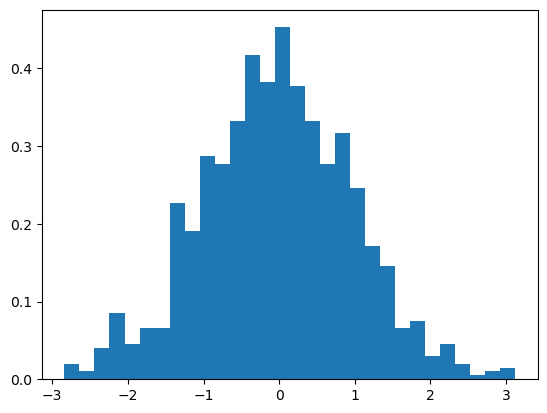

In [4]:
import matplotlib.pyplot as plt

n=1000

samples = np.random.normal(loc =0, scale=1, size= n)
plt.hist(samples, bins=30, density = True)
plt.show()

#### Exercise 1.3 (Expectation Calculation):

*Task:* Simulate 100,000 samples of a random variable that represents the outcome of a coin toss (0 for heads, 1 for tails) with 
$p=0.6$. Calculate the expected value.

*Python Tip:* Use <code>numpy.random.binomial()</code> and <code>numpy.mean()</code>.


In [9]:
CoinToss = np.random.binomial(1,0.6, 100000)
print(np.mean(CoinToss))

0.60255


#### Exercise 1.4 (Variance and Standard Deviation):

*Task:* Generate 10,000 samples of a variable following an exponential distribution with rate parameter 
$\lambda=0.5$. Calculate the variance and standard deviation.

*Python Tip:* Use <code>numpy.random.exponential()</code> and <code>numpy.var()</code>.

In [11]:
exp_samples = np.random.exponential(scale=2, size=10000)

variance = np.var(exp_samples)
std_deviation = np.std(exp_samples)

print(f"Variance: {variance}")
print(f"Écart-type: {std_deviation}")

Variance: 3.875812500039293
Écart-type: 1.9687083329023862


#### Exercise 1.5 (Law of Large Numbers):

*Task:* Simulate rolling a biased die (probability of getting 6 is 0.3) and compute the empirical mean of outcomes for increasing sample sizes. Show that the empirical mean converges to the expected value as the sample size increases.

*Python Tip:* Use <code>numpy.random.choice()</code> to generate samples and <code>matplotlib</code> to plot the empirical mean against sample size.


In [14]:
probs = [0.7/5 for _ in range(5)]
probs.append(0.3)
n=10000
step=1000

for i in range(0, n , step):
    samples=np.random.choice(range(6),i,p=probs)
    print(f"at iterative {i}, the mean is {np.mean(samples)}")

at iterative 0, the mean is nan
at iterative 1000, the mean is 2.893
at iterative 2000, the mean is 2.931
at iterative 3000, the mean is 2.918
at iterative 4000, the mean is 2.91
at iterative 5000, the mean is 2.885
at iterative 6000, the mean is 2.8666666666666667
at iterative 7000, the mean is 2.9094285714285713
at iterative 8000, the mean is 2.910125
at iterative 9000, the mean is 2.873


#### Exercise 1.6 (Central Limit Theorem):

*Task:* Simulate the sum of 100 independent uniform random variables and plot the resulting histogram. Show that the distribution approaches a normal distribution.

*Python Tip:* Use <code>numpy.random.uniform()</code> and <code>scipy.stats.norm.pdf()</code> to overlay the normal distribution.


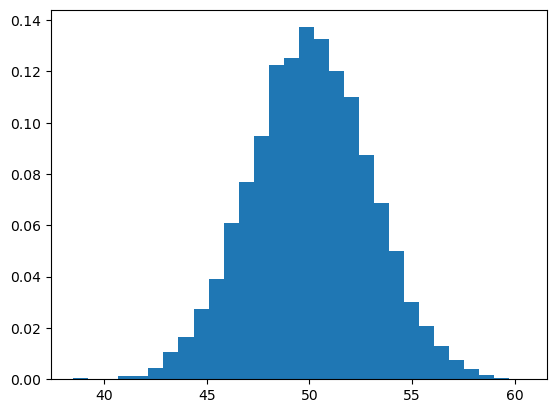

In [21]:
from scipy.stats import norm

samples= [sum(np.random.uniform(0, 1, size=100)) for _ in range (10000)]

plt.hist(samples, bins=30, density = True)
plt.show()

### 2. Statistical Inference

#### Exercise 2.1. (Point Estimation - Mean):

*Task:* Generate samples from a normal distribution with unknown mean and known variance. Use the sample mean as an estimator and compare it to the true mean.

*Python Tip:* Use <code>numpy.mean()</code> for sample mean calculation.

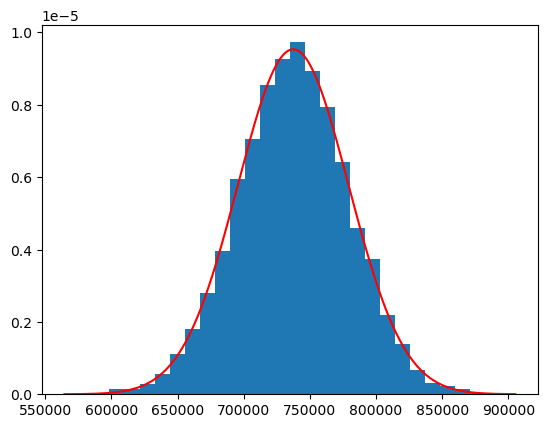

In [26]:
mean = np.random.choice(range(0, 1000000), size=1)[0]
variance = np.random.choice(range(0, 1000000), size=1)[0]

samples = [np.random.normal(loc=mean, scale=variance, size=100).mean() for _ in range(10000)]


mu = np.mean(samples)
sigma = np.std(samples)
x = np.linspace( min(samples), max(samples), 10000)
y = norm.pdf(x, mu, sigma)

plt.hist(samples, bins=30, density=True)
plt.plot(x, y, 'r')
plt.show()

#### Exercise 2.2 (Confidence Interval Estimation):

*Task:* Generate data from a normal distribution and calculate the 95% confidence interval for the mean using the standard error.

*Python Tip:* Use <code>scipy.stats.norm.interval()</code> or manually compute using sample mean and standard deviation.

In [27]:
data = np.random.normal(loc = 1, scale=4, size= 100)
m = np.mean(data)
s= np.std(data)
std_error = s / np.sqrt(len(data))

conf_interval = norm.interval(0.95, loc=m, scale=std_error)
print(f"95% Confidence Interval: {conf_interval}")

95% Confidence Interval: (0.01017701874535093, 1.6348872164302728)


#### Exercise 2.3 (Hypothesis Testing - One Sample T-test):

*Task:* Simulate a dataset representing the heights of individuals. Test if the sample mean is significantly different from a hypothesized mean of 170 cm.

*Python Tip:* Use <code>scipy.stats.ttest_1samp()</code>.

In [29]:
from scipy.stats import ttest_1samp

heights = np.random.normal(172,10,50)

t_test, p_value= ttest_1samp(heights,170)
print(p_value)

0.32653527541971994


#### Exercise 2.4 (Non-Parametric Test - Wilcoxon Test):

*Task:* Simulate two sets of data representing different treatments and test if they come from the same distribution without assuming normality.

*Python Tip:* Use <code>scipy.stats.wilcoxon()</code>.

In [ ]:
from scipy.stats import wilcoxon

treatment_1 = Np.random.normal(5,1,50)



### 3. Optimization and Differential Calculus

#### Exercise 3.1 (Gradient Descent - Finding Minima):

*Task:* Implement gradient descent to find the minimum of the function 
$$ f(x) = (x - 2)^2 + 3$$
Plot the function and the path taken by the gradient descent algorithm.

*Python Tip:* Use iterative updates of $x$ with the gradient formula and <code>matplotlib</code> for visualization.

#### Exercise 3.2 (Newton’s Method for Optimization):

*Task:* Use Newton’s method to find the root of the function 
$$ f(x) = x^3 - 2x + 1$$
Compare the convergence speed with gradient descent.

*Python Tip:* Implement the update rule using the first and second derivatives.

#### Exercise 3.3 (Numerical Derivatives):

Task: Approximate the derivative of the function 
$$ f(x) = \sin(x)$$ 
at $x=\pi/4$ using finite differences and compare with the analytical derivative.

*Python Tip:* Use <code>numpy.diff()</code> or manual calculations for finite differences.

#### Exercise 3.4 (Jacobian Calculation with Autograd):

*Task:* Compute the Jacobian matrix of the function 
$$f(x,y)=\left(x^2 +y, x−y^2\right)$$ at a given point using Python's autograd package.

*Python Tip:* Use <code>autograd</code> to automatically differentiate.

### 4. Introduction to Fixed Point

#### Exercise 4.1 (Fixed Point Iteration - Numerical Approximation)

*Task:* Implement a numerical method to find the fixed point of the function $f(x)=cos(x)$. 
A fixed point is a value of x such that $f(x)=x$. Use an iterative approach starting from an 
initial guess and observe the convergence behavior.

Steps:

1. Define the function $f(x)=cos(x)$.
2. Implement an iterative method that starts from an initial guess $x_0$​ and repeatedly applies the function 
$f$.
3. Set a convergence criterion: stop iterating when the change between iterations is smaller than a tolerance value
   (e.g., $10^{-5}$).
4. Experiment with different initial guesses and analyze how the convergence is affected.
   
*Python Tip:* Use a loop to perform the iterative process and check the difference between consecutive iterations to determine convergence.